# Preliminary Exploration Notebook

In [18]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

First, we load the data, which is split between two files. The first one is the actual data samples, and the second is a frame specificying additional details and descriptions about the data

In [2]:
school_data = pd.read_csv("data/CRDC 2015-16 School Data.csv", encoding = "ISO-8859-1")
school_layout = pd.read_csv("data/CRDC 2015-16 School Data Record Layout.csv", encoding = "ISO-8859-1")

/Users/dieterbrehm/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,6,23,24,25,30,31,1828) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The need for the second frame becomes more obvious when we look at both the naming style of the main data columns and the sheer number of the columns.

In [3]:
school_data.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_FTESERVICES_PSY,SCH_FTESERVICES_SOC,SCH_JJTYPE,SCH_JJSYDAYS,SCH_JJHOURS,SCH_JJPART_LT15,SCH_JJPART_15T30,SCH_JJPART_31T90,SCH_JJPART_91T180,SCH_JJPART_OV180
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,No,No,...,2.0,0.0,-7,-7,-7,-7,-7,-7,-7,-7
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,No,No,...,1.0,0.0,-7,-7,-7,-7,-7,-7,-7,-7
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,No,No,...,0.0,0.0,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,0.0,0.0,-7,-7,-7,-7,-7,-7,-7,-7
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,No,No,...,0.0,0.0,-9,-9,-9,-9,-9,-9,-9,-9


In fact, we have 1836 columns of data to deal with! Some of it is very rich with information and dense, while other parts of it are incomplete or sparse.

In [4]:
school_data.shape

(96360, 1836)

This is a function for linking a column code (in the main frame) and a additional description in the layout frame 

In [46]:
def describe_column(column_code):
    pd.set_option('display.max_colwidth', -1)
    desc = school_layout[school_layout["Field_Name"] == column_code]["Field_Description"].to_string()
    return desc

describe_column("SCH_JJHOURS")

'1830    Justice Facility Educational Program Hours per Week'

A few interesting data features we need to consider:

**Note:**  For cell values in the school data frame, negative numbers have special meanings as follows:  
-2 means small cell values,  
-5 means there is an action plan (next survey),  
-6 Force Certified (missing data),  
-7 System error,  
-8 EDFacts Missing Data,  
-9 means not applicable / skipped

Then, let's look at the percent of each column which doesn't contain quantitative data.

In [52]:
# print(len(school_data[school_data["LEA_STATE_NAME"] == "CALIFORNIA"]))
nul_vals = [-2,-5,-6,-7,-8,-9, '-2', '-5', '-6','-7','-8','-9']
rates = []
rates_full = []
for (columnName, columnData) in school_data.iteritems():
    error_rate = round(len(school_data[columnName][school_data[columnName].isin(nul_vals)])/school_data.shape[0], 3)
    column_name = columnName
    rates.append(error_rate)
    rates_full.append([error_rate, column_name])
#     print(error_rate, column_name)

Heres a visualization of the usable portions of the data in terms of the percent present in the frame versus the length of the frame. Documentation in the dataset provided codes for what values are to be considered not present (missing data, have future plan for data)

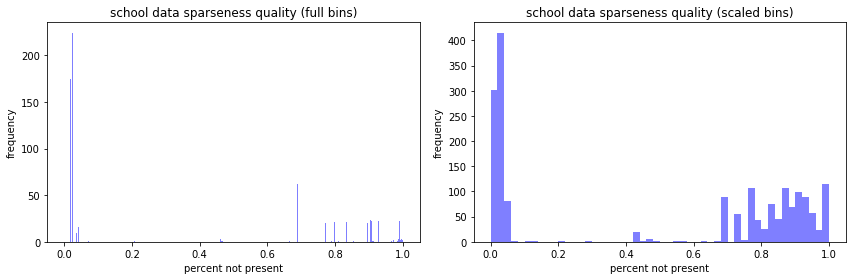

In [42]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4))
ax0.hist(rates, len(rates), facecolor='blue', alpha=0.5)
ax0.set_xlabel("percent not present")
ax0.set_ylabel("frequency")
ax0.set_title("school data sparseness quality (full bins)")

ax1.hist(rates, 50, facecolor='blue', alpha=0.5)
ax1.set_xlabel("percent not present")
ax1.set_ylabel("frequency")
ax1.set_title("school data sparseness quality (scaled bins)")

fig.tight_layout()
plt.show()

For a particular column, let's look at all of the unique values present (types of data). This is an example in the data set of a column whose data would need to be replaced with dummy variables before any modeling could occur.

**Q:** How many columns should best be represented using dummy variables?  
**Q:** Which columns do we care about?
**Q:** Which characteristics do we care about when comparing the statistics from one school to another?  
-> **Q:** What is our mission? What should people care about? Let's explore and find out!

In [48]:
column = "SCH_JJTYPE"
print(describe_column("SCH_JJTYPE")) # description of the data
print(school_data[column].unique()) # types of values present in the dataset
print(school_data[column][~school_data[column].isin(nul_vals)]) # non null data preview

1828    Justice Facility Type
[-7 -9 '-9' '-7' 'Both' 'Post' 'Pre']
2285     Both
2390     Both
2948     Both
2949     Both
3978     Both
         ... 
94401    Post
95027    Both
95908    Both
96356    Post
96357    Post
Name: SCH_JJTYPE, Length: 214, dtype: object


In [53]:
sorted(rates_full, key = lambda x: x[0])

[[0.0, 'LEA_STATE'],
 [0.0, 'LEA_STATE_NAME'],
 [0.0, 'LEAID'],
 [0.0, 'LEA_NAME'],
 [0.0, 'SCHID'],
 [0.0, 'SCH_NAME'],
 [0.0, 'COMBOKEY'],
 [0.0, 'JJ'],
 [0.0, 'SCH_GRADE_PS'],
 [0.0, 'SCH_GRADE_KG'],
 [0.0, 'SCH_GRADE_G01'],
 [0.0, 'SCH_GRADE_G02'],
 [0.0, 'SCH_GRADE_G03'],
 [0.0, 'SCH_GRADE_G04'],
 [0.0, 'SCH_GRADE_G05'],
 [0.0, 'SCH_GRADE_G06'],
 [0.0, 'SCH_GRADE_G07'],
 [0.0, 'SCH_GRADE_G08'],
 [0.0, 'SCH_GRADE_G09'],
 [0.0, 'SCH_GRADE_G10'],
 [0.0, 'SCH_GRADE_G11'],
 [0.0, 'SCH_GRADE_G12'],
 [0.0, 'SCH_GRADE_UG'],
 [0.0, 'SCH_STATUS_SPED'],
 [0.0, 'SCH_STATUS_MAGNET'],
 [0.0, 'SCH_STATUS_CHARTER'],
 [0.0, 'SCH_STATUS_ALT'],
 [0.0, 'SCH_ENR_HI_M'],
 [0.0, 'SCH_ENR_HI_F'],
 [0.0, 'SCH_ENR_AM_M'],
 [0.0, 'SCH_ENR_AM_F'],
 [0.0, 'SCH_ENR_AS_M'],
 [0.0, 'SCH_ENR_AS_F'],
 [0.0, 'SCH_ENR_HP_M'],
 [0.0, 'SCH_ENR_HP_F'],
 [0.0, 'SCH_ENR_BL_M'],
 [0.0, 'SCH_ENR_BL_F'],
 [0.0, 'SCH_ENR_WH_M'],
 [0.0, 'SCH_ENR_WH_F'],
 [0.0, 'SCH_ENR_TR_M'],
 [0.0, 'SCH_ENR_TR_F'],
 [0.0, 'TOT_ENR_M'],
 [0.

In [56]:
describe_column("SCH_DISCWDIS_MULTOOS_LEP_F")

'914    Students with disabilities who received more than one out-of-school suspension: LEP Female'